Imports

In [14]:
#Imports

import os
import requests
import json
import pandas as pd
import numpy as np
import alpaca_trade_api as alpaca
from alpaca_trade_api import REST, TimeFrame


Ford Data

In [15]:
# Read Ford data from 1.1.17 - 12.25.21

f = pd.read_csv("Data/f.csv",
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

f


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,12.200000,12.600000,12.130000,12.590000,10.204612,40510800
2017-01-04,12.770000,13.270000,12.740000,13.170000,10.674719,77638100
2017-01-05,13.210000,13.220000,12.630000,12.770000,10.350507,75628400
2017-01-06,12.800000,12.840000,12.640000,12.760000,10.342403,40315900
2017-01-09,12.790000,12.860000,12.630000,12.630000,10.237034,39438400
...,...,...,...,...,...,...
2021-12-17,20.030001,20.240000,19.600000,19.770000,19.770000,98710700
2021-12-20,19.459999,19.620001,19.049999,19.420000,19.420000,74565600
2021-12-21,19.750000,19.790001,19.330000,19.610001,19.610001,58930900


Close price plot

<AxesSubplot:xlabel='Date'>

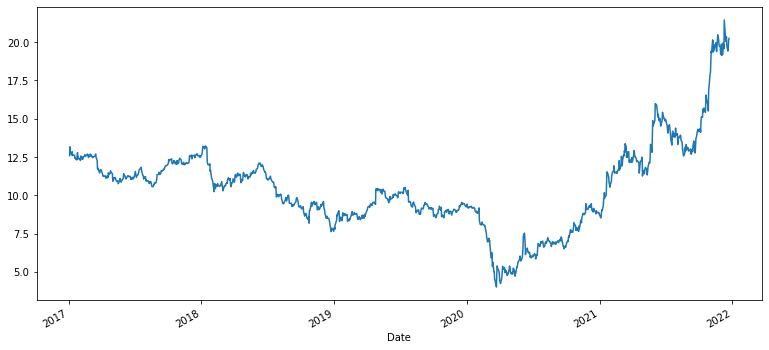

In [16]:
f["Close"].plot(
    figsize=(13,6)
)


Sharpe

In [17]:
# Annual Returns

f_annual_returns = (f["Close"].pct_change().dropna()).mean() * 252


# Annual std Deviation

f_annual_std = ((f["Close"].pct_change().dropna()).std()) * np.sqrt(252)


# Sharpe

f_sharpe = f_annual_returns / f_annual_std


print(f"returns    {f_annual_returns}")

print(f"std    {f_annual_std}")

print(f"sharpe    {f_sharpe}")


returns    0.1629234857588135
std    0.3692032571355435
sharpe    0.44128398818269454


Sliced -Close price plot

<AxesSubplot:xlabel='Date'>

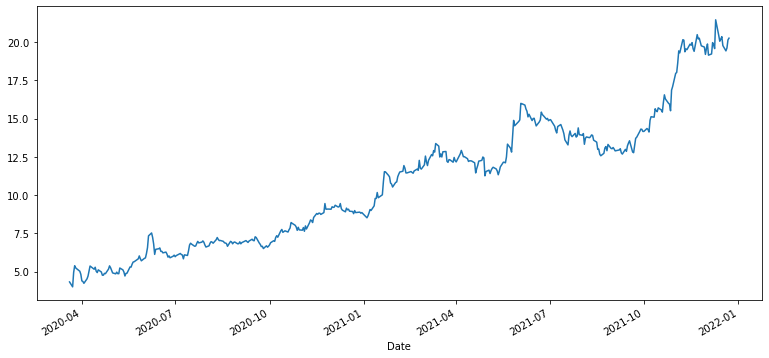

In [18]:
# Plot close price column after pandemic crash

f_sliced = f["Close"].loc["2020-3-20":"2021-12-25"]

f_sliced.plot(
    figsize=(13,6)
)


Sliced - Sharpe

In [19]:
# annual returns

f_sliced_annual_returns = (f_sliced.pct_change().dropna()).mean() * 252


# annual std deviation

f_sliced_annual_std = ((f_sliced.pct_change().dropna()).std()) * np.sqrt(252)


# sharpe ratio

f_sliced_sharpe = f_sliced_annual_returns / f_sliced_annual_std


print(f"sliced returns    {f_sliced_annual_returns}")

print(f"sliced std    {f_sliced_annual_std}")

print(f"sliced sharpe    {f_sliced_sharpe}")


sliced returns    0.9891704875293401
sliced std    0.48427475283449334
sliced sharpe    2.0425811623250176
